In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\91861\Desktop\Artifical Intelligence\Machine Leraning\8. K_Nearest_Neighbour\Salary_dataset.csv")

In [3]:
df.head()

,YearsExperience,Age,Education,JobType,Location,CompanySize,PerformanceRating,ProjectsCompleted,Certifications,Promoted,Salary
0,1.1,22,Bachelor,Engineering,Urban,Medium,3,2,0,No,45000
1,1.3,23,Bachelor,Marketing,Suburban,Small,3,3,1,No,42000
2,1.5,24,Bachelor,Sales,Urban,Medium,4,4,1,No,46000
3,1.8,25,Bachelor,HR,Rural,Small,3,2,0,No,38000
4,2.0,26,Bachelor,DataScience,Urban,Large,4,5,2,No,55000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsExperience    99 non-null     float64
 1   Age                99 non-null     int64  
 2   Education          99 non-null     object 
 3   JobType            99 non-null     object 
 4   Location           99 non-null     object 
 5   CompanySize        99 non-null     object 
 6   PerformanceRating  99 non-null     int64  
 7   ProjectsCompleted  99 non-null     int64  
 8   Certifications     99 non-null     int64  
 9   Promoted           99 non-null     object 
 10  Salary             99 non-null     int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 8.6+ KB


In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Define correct orders
education_order = ['Bachelor', 'Master', 'PhD']
jobtype_order = ['HR', 'Sales', 'Marketing', 'Engineering', 'DataScience', 'Management']
location_order = ['Rural', 'Suburban', 'Urban']
companysize_order = ['Small', 'Medium', 'Large']
promoted_order = ['No', 'Yes']

# Ordinal Encoder
encoder = OrdinalEncoder(categories=[
    education_order,
    jobtype_order,
    location_order,
    companysize_order,
    promoted_order
])

# Apply encoding
df[['Education', 'JobType', 'Location', 'CompanySize', 'Promoted']] = \
    encoder.fit_transform(
        df[['Education', 'JobType', 'Location', 'CompanySize', 'Promoted']]
    )

# Optional: convert to int for clarity
df[['Education', 'JobType', 'Location', 'CompanySize', 'Promoted']] = \
    df[['Education', 'JobType', 'Location', 'CompanySize', 'Promoted']].astype(int)

# Final check
print(df.dtypes)


YearsExperience      float64
Age                    int64
Education              int32
JobType                int32
Location               int32
CompanySize            int32
PerformanceRating      int64
ProjectsCompleted      int64
Certifications         int64
Promoted               int32
Salary                 int64
dtype: object


In [6]:
df.head()

,YearsExperience,Age,Education,JobType,Location,CompanySize,PerformanceRating,ProjectsCompleted,Certifications,Promoted,Salary
0,1.1,22,0,3,2,1,3,2,0,0,45000
1,1.3,23,0,2,1,0,3,3,1,0,42000
2,1.5,24,0,1,2,1,4,4,1,0,46000
3,1.8,25,0,0,0,0,3,2,0,0,38000
4,2.0,26,0,4,2,2,4,5,2,0,55000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsExperience    99 non-null     float64
 1   Age                99 non-null     int64  
 2   Education          99 non-null     int32  
 3   JobType            99 non-null     int32  
 4   Location           99 non-null     int32  
 5   CompanySize        99 non-null     int32  
 6   PerformanceRating  99 non-null     int64  
 7   ProjectsCompleted  99 non-null     int64  
 8   Certifications     99 non-null     int64  
 9   Promoted           99 non-null     int32  
 10  Salary             99 non-null     int64  
dtypes: float64(1), int32(5), int64(5)
memory usage: 6.7 KB


In [8]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1:]

In [9]:
y.head()

,Salary
0,45000
1,42000
2,46000
3,38000
4,55000


In [10]:
x.head()

,YearsExperience,Age,Education,JobType,Location,CompanySize,PerformanceRating,ProjectsCompleted,Certifications,Promoted
0,1.1,22,0,3,2,1,3,2,0,0
1,1.3,23,0,2,1,0,3,3,1,0
2,1.5,24,0,1,2,1,4,4,1,0
3,1.8,25,0,0,0,0,3,2,0,0
4,2.0,26,0,4,2,2,4,5,2,0


In [11]:
print(x.shape,y.shape)

(99, 10) (99, 1)


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2) 

In [13]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(79, 10) (20, 10) (79, 1) (20, 1)


In [14]:
knn=KNeighborsRegressor(n_neighbors=5)

In [15]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [16]:
y_pred=knn.predict(x_test)

In [17]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 5380.0
MSE 64840000.0
R2 score 0.9377555918210617


In [18]:
scores = []

for i in range(1,15):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    y_pred = knn.predict(x_test)

    scores.append(r2_score(y_test,y_pred))

In [19]:
print(scores)

[0.9570413746760104, 0.9355020639339541, 0.9403752413256109, 0.9410518863396371, 0.9377555918210617, 0.932536825488251, 0.9366087223984343, 0.9324069129787846, 0.9294736642501514, 0.9171133723720841, 0.9085165142484036, 0.901448820304417, 0.8882098731420476, 0.8868676202361524]


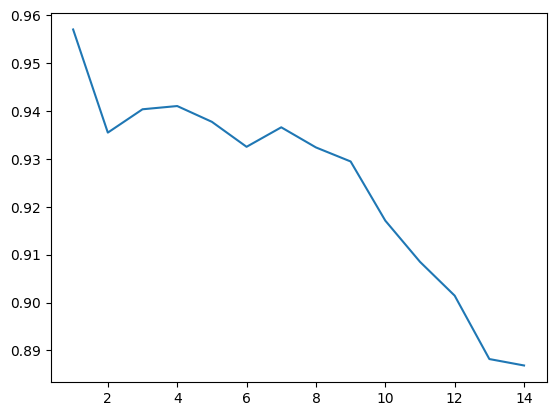

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1,15),scores)


In [21]:
# k= 1,2  ----> overfitting
# k= Big number ----> underfitting